# Análisis Exploratorio de Datos: Salarios en la Industria Tecnológica

**Autor:** [Diego Gamarra]
**Fecha:** [7 de febrero 2025]

## Introducción

En este proyecto, realizaremos un análisis exploratorio de datos (EDA) completo sobre un conjunto de datos que contiene información sobre salarios en la industria tecnológica. El objetivo es obtener una comprensión profunda de los datos, identificar patrones, relaciones y características relevantes que nos permitan entender mejor el panorama de los salarios en este sector. Además, aplicaremos técnicas estadísticas para extraer información significativa y formular conclusiones basadas en la evidencia.

**Conjunto de Datos:**

El conjunto de datos contiene las siguientes variables:

-   `work_year`: Año en que se pagó el salario.
-   `experience_level`: Nivel de experiencia en el trabajo durante el año.
-   `employment_type`: Tipo de empleo para el puesto.
-   `job_title`: El rol en el que se trabajó durante el año.
-   `salary`: El monto total del salario bruto pagado.
-   `salary_currency`: La moneda del salario pagado como un código de moneda ISO 4217.
-   `salary_in_usd`: El salario en USD (tasa de cambio dividida por la tasa promedio de USD para el año correspondiente a través de fxdata.foorilla.com).
-   `employee_residence`: País de residencia principal del empleado durante el año laboral como un código de país ISO 3166.
-   `remote_ratio`: La cantidad total de trabajo realizado de forma remota.
-   `company_location`: El país de la oficina principal del empleador o sucursal contratante.
-   `company_size`: El número promedio de personas que trabajaron para la empresa durante el año.

**Objetivos:**

-   Realizar un análisis exploratorio completo del conjunto de datos.
-   Identificar las características más relevantes que influyen en los salarios.
-   Formular conclusiones basadas en el análisis estadístico.
-   Utilizar técnicas de visualización para comunicar los hallazgos de manera efectiva.
-   Aplicar imputación de datos, transformación, normalización y estandarización cuando sea necesario.
-   Realizar análisis univariado, multivariado y estadístico.


## 1. Importar Librerías

En esta sección, importaremos las librerías necesarias para el análisis de datos.

**Instrucción:** Importa las librerías `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, `scipy.stats` y de `sklearn` las de escalado y `ttest_1samp`.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, ttest_1samp
from sklearn.preprocessing import StandardScaler


## 2. Carga y Descripción General del Conjunto de Datos

En esta sección, cargaremos el conjunto de datos y obtendremos una descripción general de su estructura y contenido.

**Instrucción:** Carga el conjunto de datos desde el archivo CSV proporcionado (o crea un DataFrame de ejemplo con los datos proporcionados en la Introducción) en un DataFrame de `pandas` llamado `df`.

In [54]:
df = pd.read_csv("data/global_tech_salary.csv")

df_respaldo = df.copy()

**Instrucción:** Muestra las primeras 5 filas del DataFrame `df`.

In [55]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M


**Instrucción:** Utiliza el método `info()` para obtener un resumen del DataFrame, incluyendo los tipos de datos y la cantidad de valores no nulos en cada columna.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   experience_level    5000 non-null   object
 2   employment_type     5000 non-null   object
 3   job_title           5000 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_currency     5000 non-null   object
 6   salary_in_usd       5000 non-null   int64 
 7   employee_residence  5000 non-null   object
 8   remote_ratio        5000 non-null   int64 
 9   company_location    5000 non-null   object
 10  company_size        5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


-Vemos que no contamos con valores nulos, no se necesitará limpieza

**Instrucción:** Utiliza el método `describe()` para obtener estadísticas descriptivas de las variables numéricas del DataFrame.

In [57]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,2023.136400,1.588089e+05,148924.465200,32.800000
std,0.696198,2.072854e+05,66986.391667,46.492928
min,2020.000000,1.500000e+04,15000.000000,0.000000
25%,2023.000000,1.019408e+05,100573.250000,0.000000
50%,2023.000000,1.420000e+05,140304.000000,0.000000
75%,2024.000000,1.870000e+05,185900.000000,100.000000
max,2024.000000,8.500000e+06,750000.000000,100.000000


- En la columna salary veo algunas letras, no sé si se refiere a que es un número muy grande 
- En la columna salario en dolares, vemos una desviación estandar bastante grane

## 3. Análisis de Tipos de Variables y Distribuciones

En esta sección, analizaremos los tipos de variables presentes en el conjunto de datos y visualizaremos sus distribuciones.


**Instrucción:** Determina el tipo de variable de cada columna (numérica, categórica, etc.).

In [58]:
df.shape

(5000, 11)

In [59]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

#### Categoricas:
- job_title
- company_location
- experience_level
- employment_type	
- salary_currency
- company_size
- employee_residence
#### Numericas:
- salary
- salary_in_usd
- remote_ratio
- work_year (aunque esta la consideraré como categorica)


**Instrucción:** Crea histogramas para visualizar la distribución de las variables numéricas (`salary`, `salary_in_usd`).

### Tenemos en cuenta las distintas monedas para un gráfico correcto:

In [60]:
df["salario_escalado"] = (df["salary"] - df["salary"].min()) / (df["salary"].max() - df["salary"].min())  #Escalar el salarlio, en este caso no tan útil

df["salary_currency"].value_counts() #Vemos todos los tipos de monedas


salary_currency
USD    4623
GBP     171
EUR     151
CAD      20
INR      15
AUD       4
PLN       3
SGD       2
DKK       2
THB       2
PHP       1
NZD       1
MXN       1
JPY       1
CHF       1
BRL       1
TRY       1
Name: count, dtype: int64

### Histogramas para la variable salary (Escalado y sin  escalar)


 Curtosis: 761.2468145497207

 Asimetría: 23.90462426363539


<Axes: xlabel='salary', ylabel='Count'>

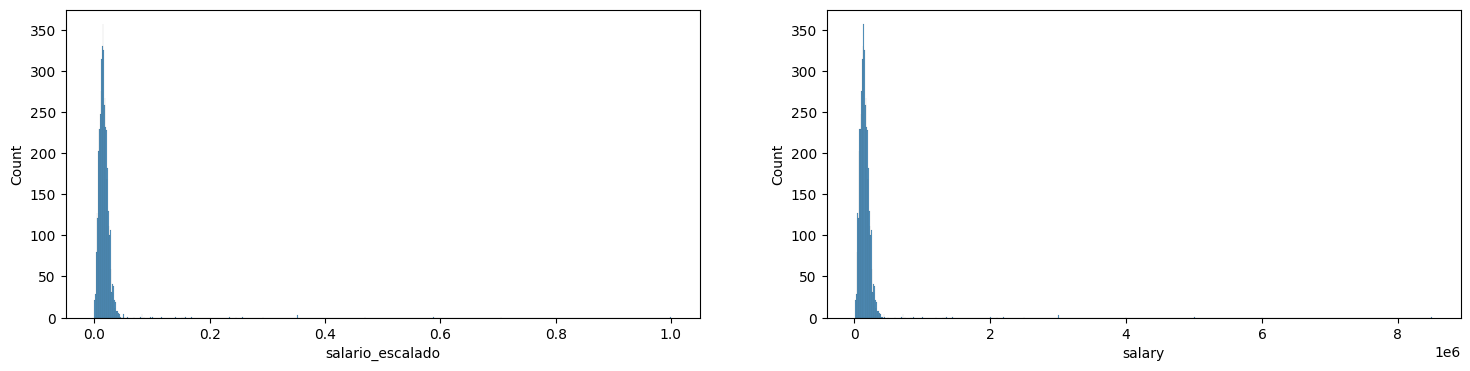

In [61]:

    
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
sns.histplot(
    data=df,
    x = "salario_escalado",  #De igual manera al escalarlo no sale un gráfico legible
    ##kde=True
)

print(f"\n Curtosis: {kurtosis(df["salario_escalado"])}")
print(f"\n Asimetría: {skew(df["salario_escalado"])}")


plt.subplot(1,2,2)
sns.histplot(
    data=df,
    x = "salary",  #De igual manera al escalarlo no sale un gráfico legible
    ##kde=True
)


- Una curtosis super alta, nos indica un pico gigante de los datos, se debe a los distintos tipos de moneda. La gran mayoria siendo dolares, por eso el pico tan grande. Por lo mencionado anteriormente, se ve un sesgo positivo enorme. 

### Boxplot para salary (escalado y sin escalar)

<Axes: xlabel='salary'>

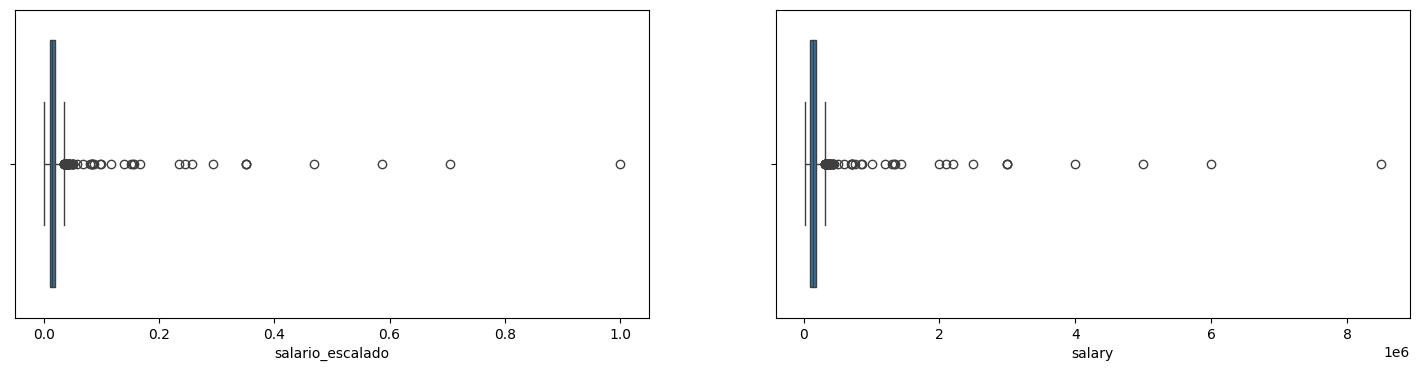

In [62]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)

sns.boxplot(
    data=df,
    x = "salario_escalado",
)

plt.subplot(1,2,2)
sns.boxplot(
    data=df,
    x = "salary",
)


- Misma observación que con el histograma, debido a las distintas monedas y la concentraciond e salarios en dólares, se ve que la mayoria se concentra en un rango muy bajo, que en realidad no necesariamente sería un sueldo bajo, es bajo con respecto a la escala del gráfico debido a las distintas monedas

- No es lo mismo 50.000 dolares que 50.000 dolares pero en pesos o bolivares, solo por dar un ejemplo, a eso se debe el sesgo y el gráfico

### Gráficos con las monedas filtradas (USD)


 Curtosis: 6.010668651488791

 Asimetría: 1.2806301698138658


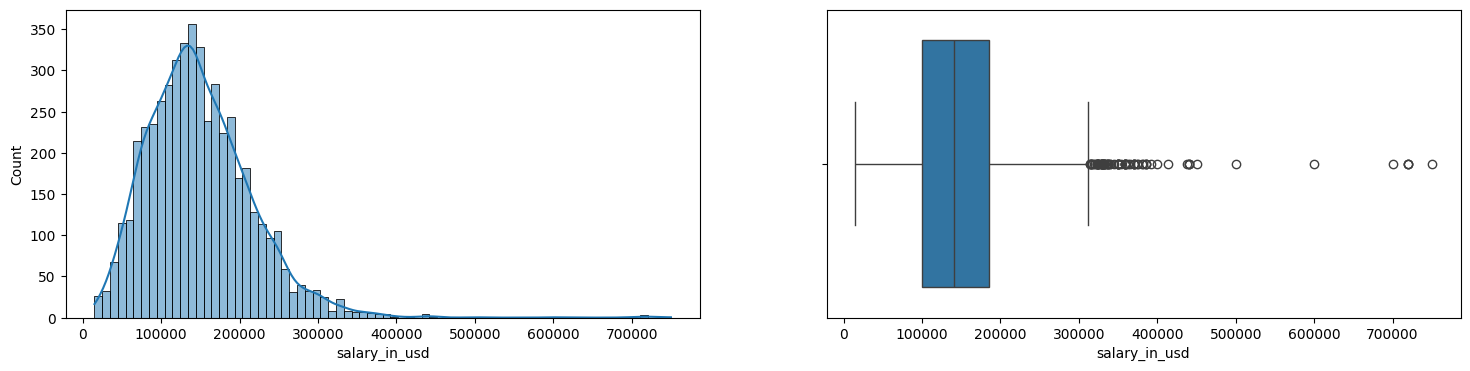

In [63]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)

sns.histplot(
    data=df,
    x = "salary_in_usd",
    kde=True
)

print(f"\n Curtosis: {kurtosis((df["salary_in_usd"]))}")
print(f"\n Asimetría: {skew(df["salary_in_usd"])}")

plt.subplot(1,2,2)

sns.boxplot(
    data=df,
    x = "salary_in_usd",
)

plt.show()

#### Histograma:
- Acá sí se ven resultados realistas y entendibles debido a estandarizacion en dolares
- Se ve una curtosis de 6, que indica una distribucion ligeramente cercana a la normal.  
- Una asimetría que indica un ligero sesgo positivo
#### Boxplot:
- El 50% de los salarios rondan los 100.000 y 180.000 dolares aproximadamente
- Se ve que la mediana es aproximadamente 140.000, esto dice que la mitad de los sueldos estan por debajo de 140mil y por encima de 140mil
- Se ve una importante cantidad de outliers entre poco más de 300.000 y poco más de 700.000

**Instrucción:** Crea gráficos de barras para visualizar la distribución de las variables categóricas (`experience_level`, `employment_type`, `job_title`, `employee_residence`, `company_location`, `company_size`).

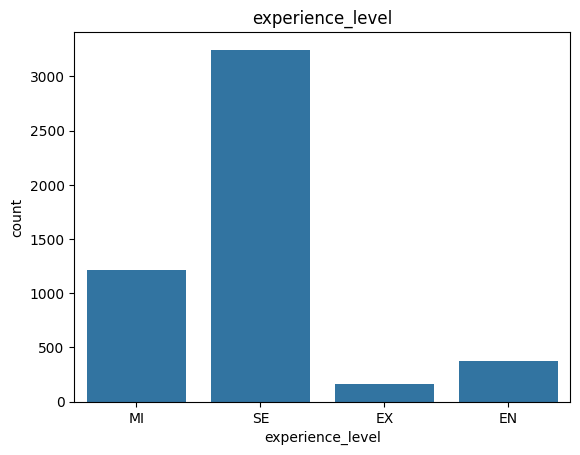

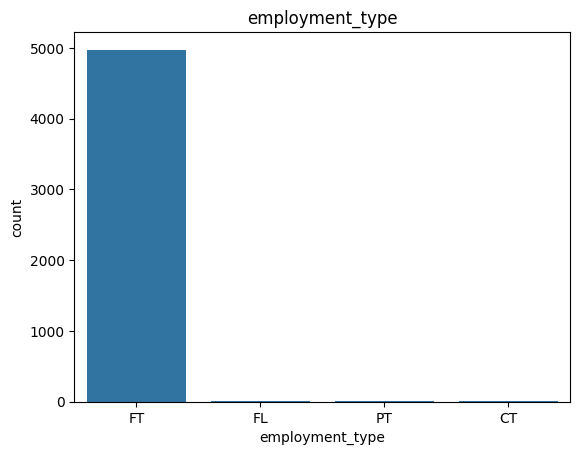

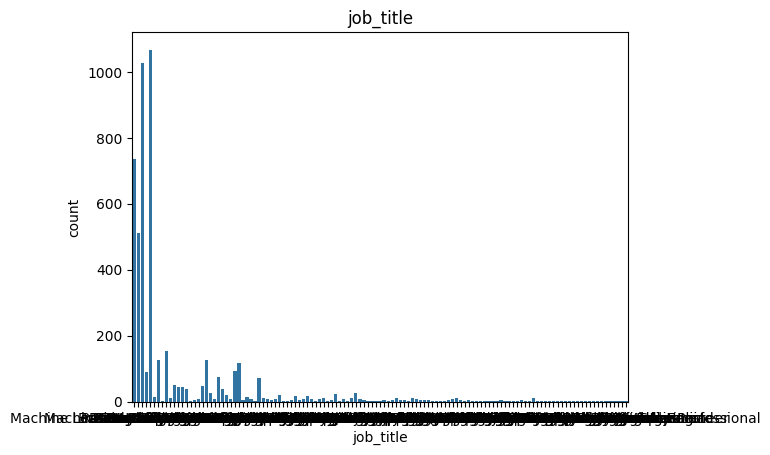

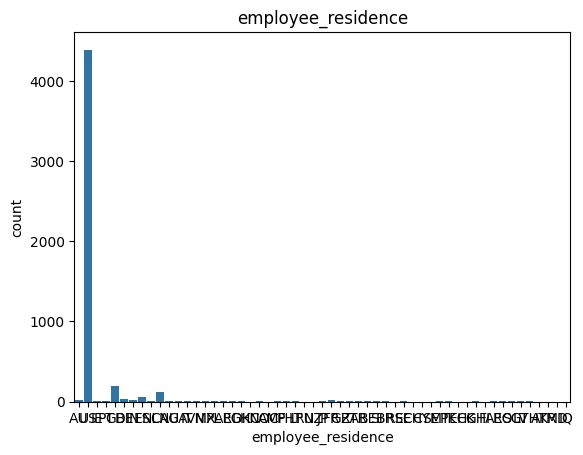

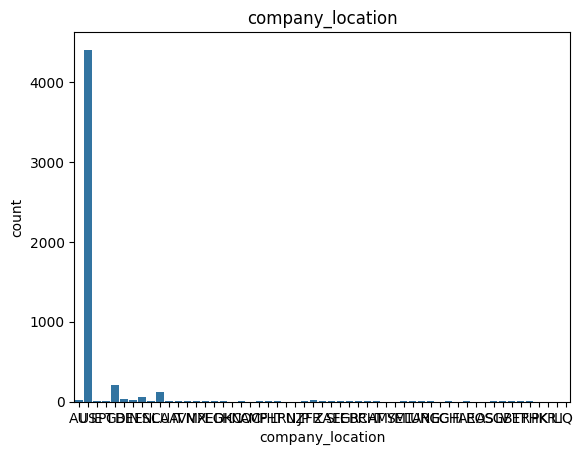

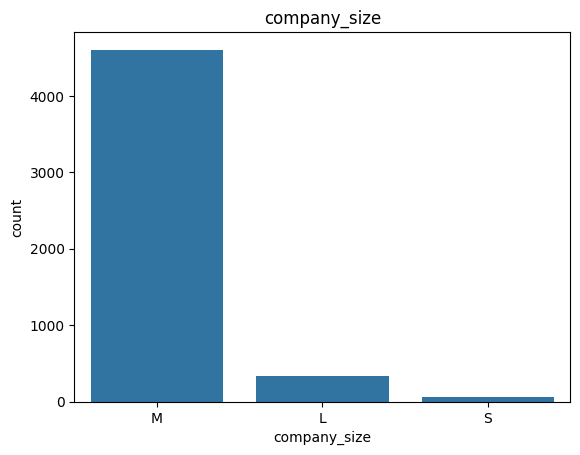

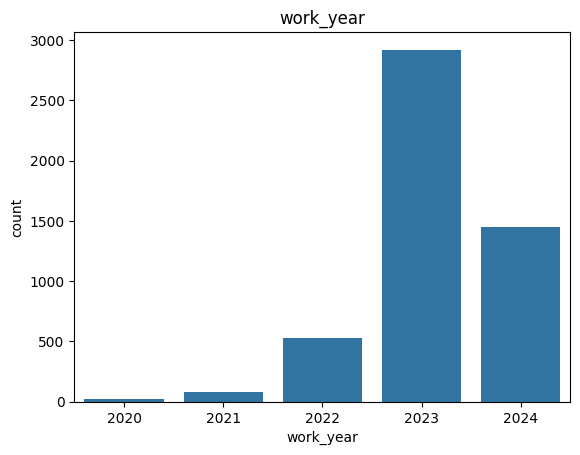

In [64]:
lista_categoricos = ["experience_level", "employment_type", "job_title", "employee_residence", "company_location", "company_size", "work_year"] #Adicionalmente agregamos work_year

for column in lista_categoricos:
    
    sns.countplot(
        data=df,
        x = column
    )
    plt.title(column)
    plt.show()
    

## 4. Análisis de Proporciones de Nulos

En esta sección, analizaremos la proporción de valores nulos en cada columna del DataFrame.

**Instrucción:** Calcula la proporción de valores nulos en cada columna del DataFrame.  Muestra los resultados en forma de tabla y también visualízalos con un gráfico de barras.

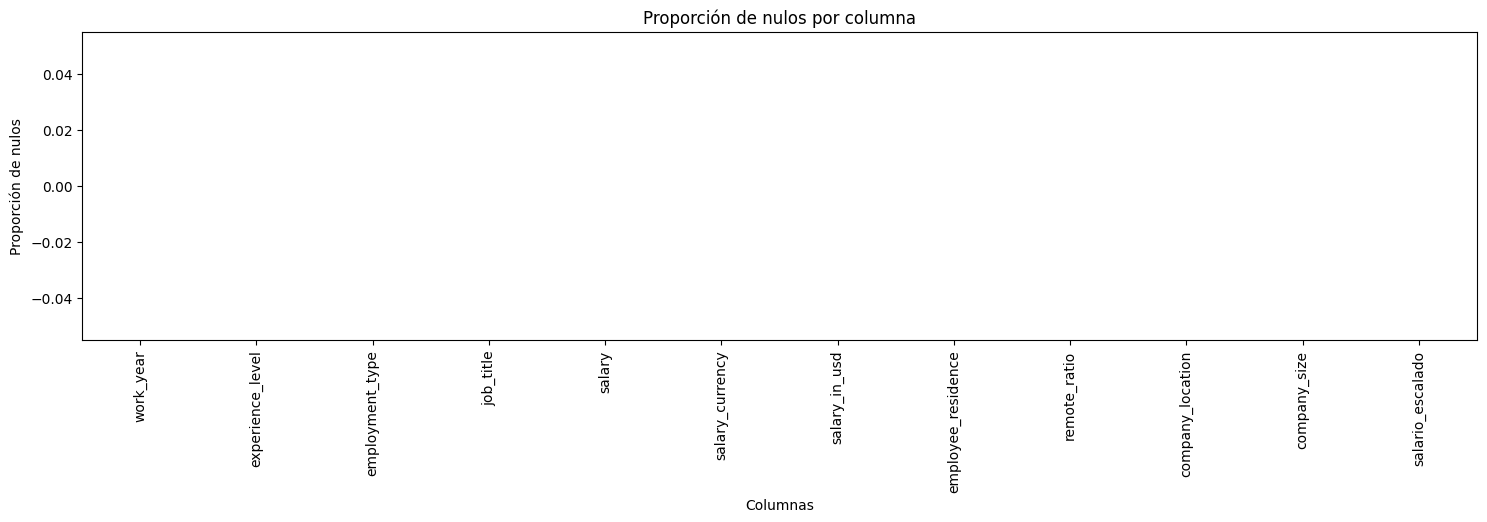

In [65]:
#Proporcion de nulos

# Nos da la proporcion de nulos por columna
null_proportion = df.isnull().mean().reset_index()

# Renombramos las columnas
null_proportion.columns = ["columna", "proporcion_nulos"]

#Mostramos en un gráfico la proporcion de nulos por columna
plt.figure(figsize=(18,4))
sns.barplot(
    data=null_proportion,
    x="columna",
    y="proporcion_nulos"
)

plt.title("Proporción de nulos por columna")
plt.xlabel("Columnas")
plt.ylabel("Proporción de nulos")
plt.xticks(rotation=90)
plt.show()



## 5. Imputación de Datos Nulos

En esta sección, imputaremos los valores nulos en las columnas que lo requieran.  Justifica la elección del método de imputación en cada caso.

### No es necesario imputar nulos ya que no contamos con eso

**Instrucción:** Imputa los valores nulos en las columnas que consideres necesario.  Utiliza el método de imputación que consideres más apropiado para cada caso (media, mediana, moda, valor constante, KNNImputer, etc.).  Documenta y justifica tus decisiones.

## 6. Transformación de Variables

En esta sección, transformaremos las variables que lo requieran para mejorar el análisis.  Por ejemplo, podríamos convertir variables categóricas a numéricas usando one-hot encoding o label encoding.

**Instrucción:** Identifica las variables que podrían beneficiarse de una transformación y aplica la transformación adecuada (one-hot encoding, label encoding, etc.).  Justifica tus decisiones.

In [66]:
df["experience_level"].unique()

array(['MI', 'SE', 'EX', 'EN'], dtype=object)

In [67]:
# Convertiré la categoria de nivel de experiencia a numérica, ya que tiene un orden lógico

#Mi interpretacion es la siguiente:
# 1 EN (Entry Level) 
# 2 MI (Mid Level) 
# 3 SE (Senior Level)
# 4 EX (Executive) 

diccionario_experiencia = {
    "EN": 1,
    "MI": 2,
    "SE": 3,
    "EX": 4
}

# Creamos una nueva columna de experiencia numérica
df["experience_level_num"] = df["experience_level"].map(diccionario_experiencia)

df[["experience_level_num" , "experience_level"]].head()

,experience_level_num,experience_level
0,2,MI
1,2,MI
2,2,MI
3,3,SE
4,2,MI


## 7. Normalización y Estandarización de Variables

En esta sección, aplicaremos técnicas de escalado a las variables numéricas. La **normalización** ajusta los valores a un rango entre 0 y 1, mientras que la **estandarización** transforma los datos para que tengan una media de 0 y una desviación estándar de 1.


**Instrucción:** Normaliza la variable `salary_in_usd` usando el método de escalado Min-Max. Crea una nueva columna llamada `salary_in_usd_norm` para almacenar los valores normalizados.

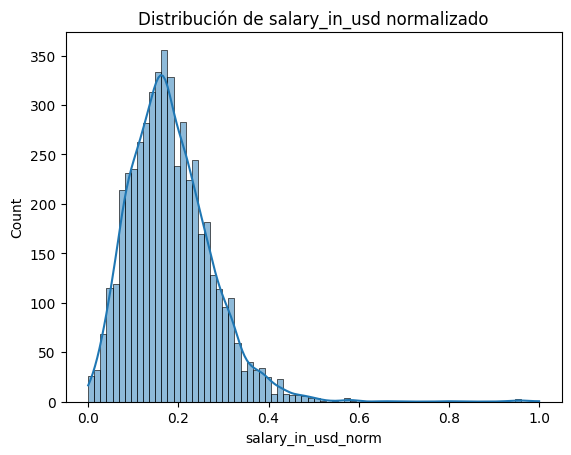

In [68]:
# -- Escribe aquí tu código para la normalización de 'salary_in_usd' --

df["salary_in_usd_norm"] = (df["salary_in_usd"] - df["salary_in_usd"].min()) / (df["salary_in_usd"].max() - df["salary_in_usd"].min())


sns.histplot(
    data=df,
    x="salary_in_usd_norm",
    kde=True
)
plt.title("Distribución de salary_in_usd normalizado")
plt.show()

- Larga cola a la derecha, sesgo positivo, posiblemente outliers
- La mayoria de salarios son relativamente bajos pero ese sesgo influye en la distribucion
- La mayoria de salarios se encuentra en un rango bastate estrecho
- Los salarios altos son muy poco frecuentes
- Los salarios más altos son casos excepcionales, pueden ser puestos de trabajo muy especificos

**Instrucción:** Estandariza la variable `salary_in_usd` creando una nueva columna llamada `salary_in_usd_std`. Utiliza `StandardScaler` de `scikit-learn`.

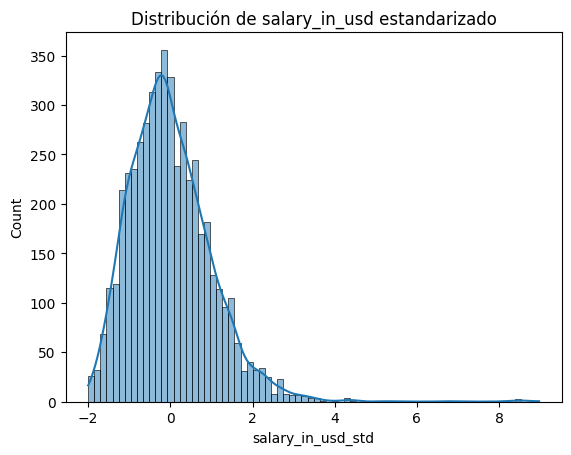

In [69]:
# -- Escribe aquí tu código para la estandarización de 'salary_in_usd' --

# INstancair el objeto StandardScaler
scaler = StandardScaler()

df["salary_in_usd_std"] = scaler.fit_transform(df[["salary_in_usd"]])


sns.histplot(
    data=df,
    x="salary_in_usd_std",
    kde=True
)
plt.title("Distribución de salary_in_usd estandarizado")
plt.show()


- Se confirma lo mencionado anteriormente, un gran sesgo positivo y outliers, se ve hasta inclusive 8 desviaciones estandar

**Pregunta:** ¿Qué ventajas tiene la estandarización sobre la normalización en este caso? ¿En qué situaciones es preferible usar una u otra?


In [70]:
# -- Escribe aquí tu respuesta a la pregunta sobre normalización y estandarización --

"""
    Estandarizacion (centrar en 0): 
        Veo utilidad para detectar outliers facilmente gracias al z-score
        
    Normalización (escalar entre 0 y 1):
         Sirve para comparar datos que tienen diferentes unidades de medida o en escalas distintas
        
"""

'\n    Estandarizacion (centrar en 0): \n        Veo utilidad para detectar outliers facilmente gracias al z-score\n        \n    Normalización (escalar entre 0 y 1):\n         Sirve para comparar datos que tienen diferentes unidades de medida o en escalas distintas\n        \n'

## 8. Análisis de Proporciones

En esta sección, analizaremos las proporciones de las diferentes categorías dentro de las variables categóricas.


**Instrucción:** Para cada variable categórica, calcula la proporción de cada categoría y visualízala con un gráfico de barras o un gráfico circular.

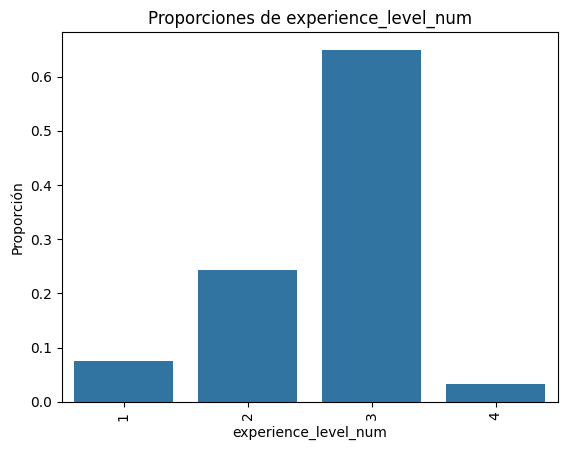

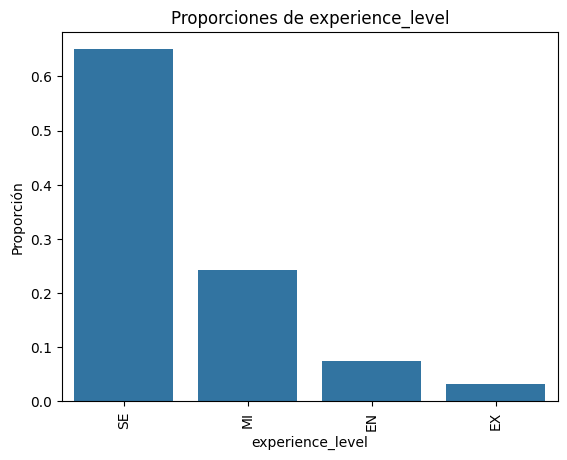

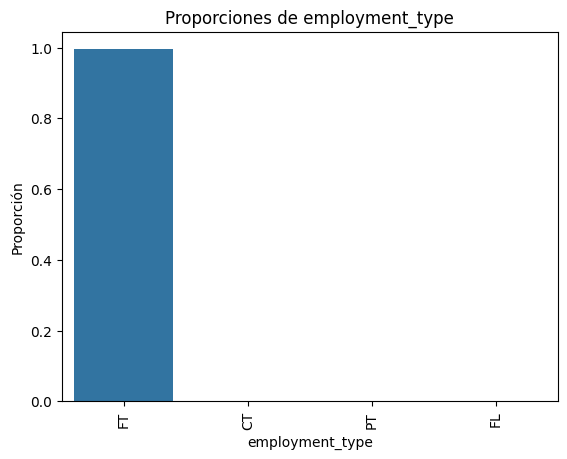

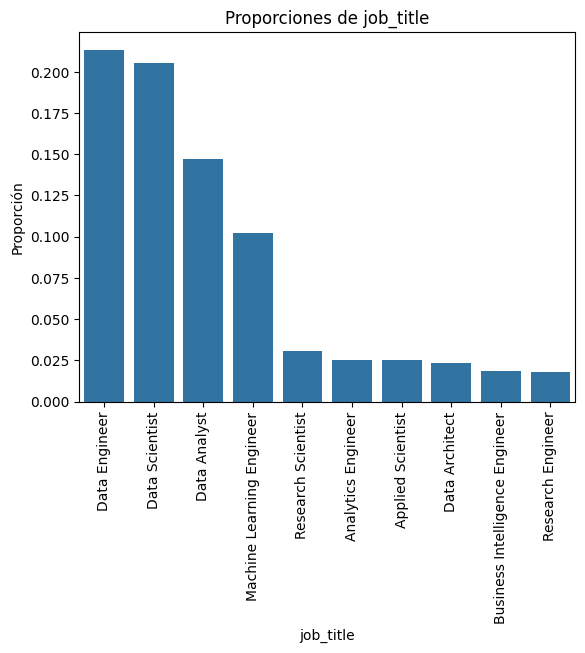

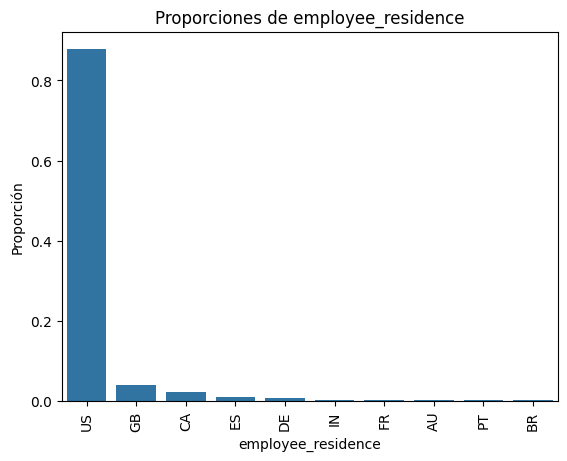

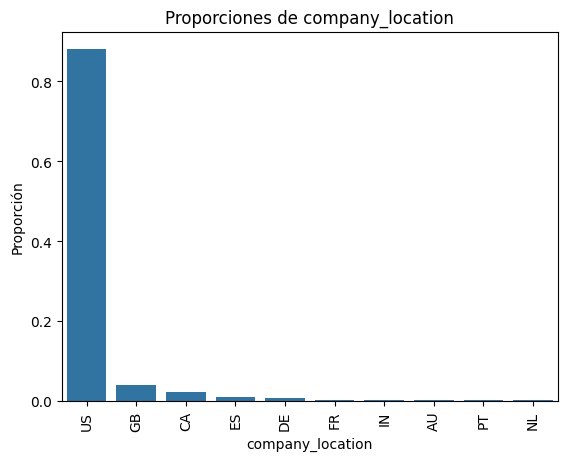

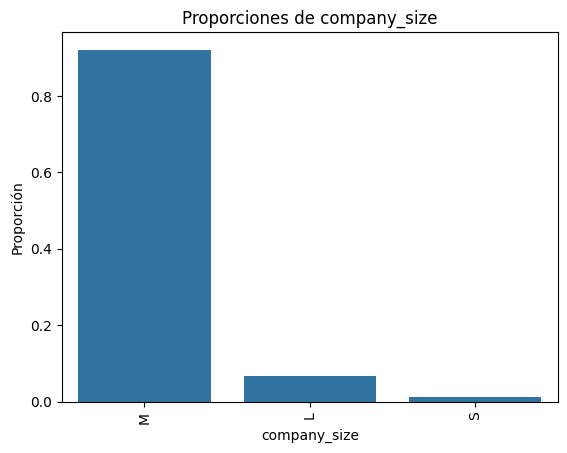

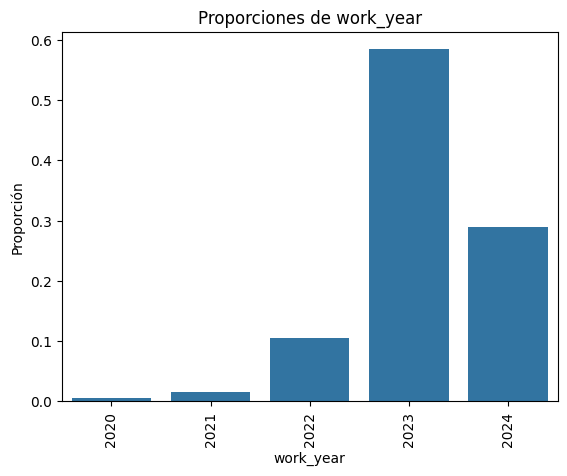

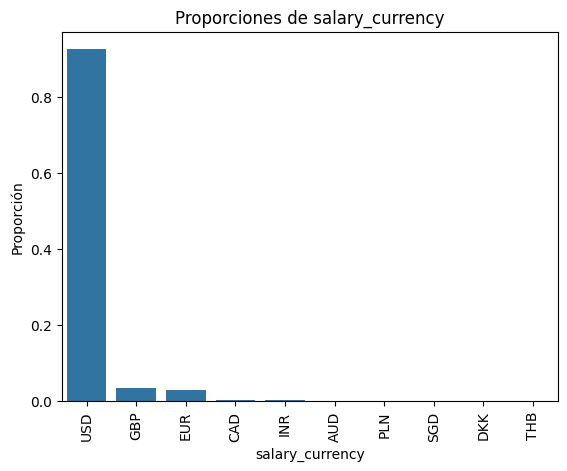

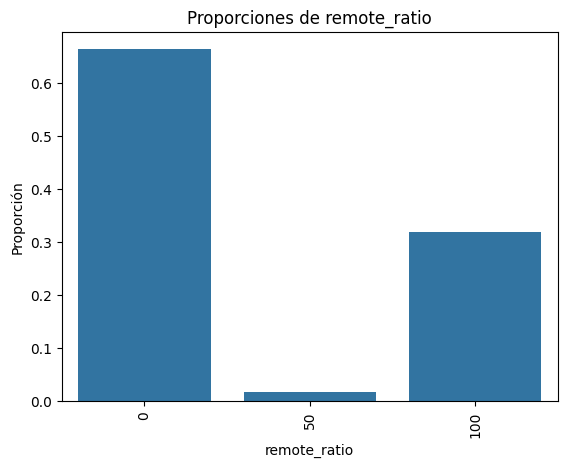

In [71]:
# -- Escribe aquí tu código para el análisis de proporciones --
#Le agregamos experience_level_num para ver posibles sesgos, ya que se puede ver sesgos si son categoricas ordinales
lista_categoricos = ["experience_level_num","experience_level", "employment_type", "job_title", "employee_residence", "company_location", "company_size", "work_year", "salary_currency", "remote_ratio"] 


for column in lista_categoricos:
    proporciones = df[column].value_counts(normalize=True).head(10) #Pongo 10 para que no se vea tan saturado
    
    sns.barplot(
        x = proporciones.index,
        y = proporciones.values,
    ) 
    
    plt.title(f"Proporciones de {column}")
    plt.xlabel(column)
    plt.ylabel("Proporción")
    plt.xticks(rotation=90)
    plt.show()

#### experience_level:
- Se ve que más del 60% son seniors
#### employment_type:
- Casi el 100% de los empletos son de tiempo completo
#### job_title:
- Los 3 trabajos más presentes son data engineer, data scientist y data analyst. Estos ocupan el 50% de los puestos de trabajo
#### employee_residence:
- Casi el 90% de las residencias son en estados unidos, le sigue el reino unido y canadá, ambos con menos del 10%
#### company_location:
- Al igual que las residencias de los empleados, las empresas están situadas casi en un 90% en estados unidos, le sigue el reino unido y canadá, ambos con menos del 10%
#### company_size:
- Casi el 90% de las empresas son medianas 

## 9. Análisis de Correlación

En esta sección, analizaremos la correlación entre las variables numéricas del conjunto de datos.


**Instrucción:** Calcula la matriz de correlación entre las variables numéricas y visualízala con un mapa de calor (heatmap).

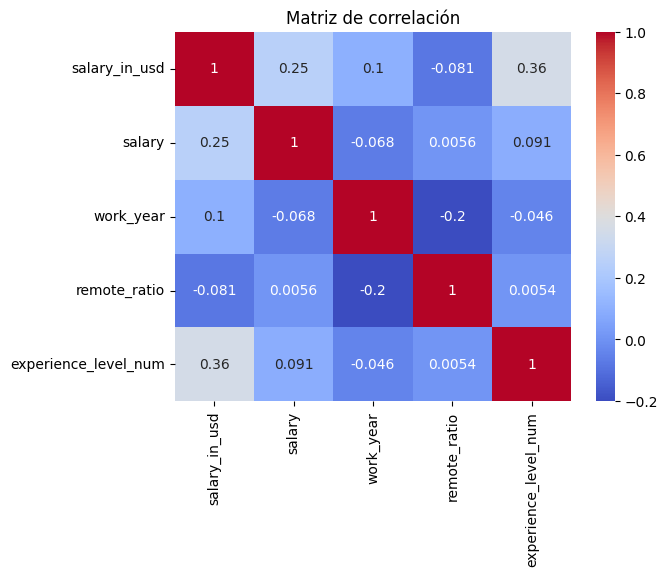

In [72]:
# -- Escribe aquí tu código para el análisis de correlación --

variables_numericas = df[["salary_in_usd", "salary", "work_year", "remote_ratio", "experience_level_num"]]

matriz_de_correlacion = variables_numericas.corr()

sns.heatmap(
    data=matriz_de_correlacion,
    annot=True, 
    cmap="coolwarm",    
)
plt.title("Matriz de correlación")
plt.show()

**Instrucción:** Identifica las variables con alta correlación (positiva o negativa).  En el contexto de este conjunto de datos, ¿qué implicaciones puede tener la alta correlación entre dos variables para el análisis o la construcción de modelos predictivos?

- La unica correlación relativamente alta que identifico es la experiencia con el salario, a medida que la experiencia aumenta, tambien el salario, pero no es tan notorio o significativo
- La correlación entre dos variables nos puede ayudar para predecir qué valor podría tomar, te da una idea general


## 10. Imputación de Variables con Alta Correlación

En esta sección, utilizaremos las variables con alta correlación para imputar valores faltantes (si los hay) de forma más precisa, mediante un modelo predictivo (por ejemplo regresión lineal o KNN).

**Instrucción:** Si identificaste variables con alta correlación en la sección anterior, y si alguna de esas variables tiene valores faltantes, utiliza un modelo de regresión lineal o `KNNImputer` para imputar los valores faltantes en función de la variable con la que tiene mayor correlación.  Si no hay variables con alta correlación y valores faltantes, puedes omitir esta sección.

In [73]:
# -- Escribe aquí tu código para la imputación basada en correlación --
# OMITO ESTA SECCION, NO HAY VALORES NULOS NI UNA ALTA CORRELACION

## 11. Análisis de Outliers e Imputación de Outliers

En esta sección, identificaremos y trataremos los outliers en las variables numéricas.


**Instrucción:** Utiliza el método del Z-score modificado (MAD) y el método del IQR para identificar outliers en las variables `salary_in_usd`. Puedes usar las variables que creaste en los pasos anteriores `salary_in_usd_std` y `salary_in_usd_norm` respectivamente.


In [74]:
# -- Escribe aquí tu código para la detección de outliers --

# Añadimos a un nuevo dataframe las columnas consideradas como outliers

df_outliers = df.query("salary_in_usd_std > 3 | salary_in_usd_std < -3")

# Eliminamos los outliers del dataframe original 

df = df.query("salary_in_usd_std <= 3 & salary_in_usd_std >= -3")   #otra manera  df = df.loc[(df['salary_in_usd_std'] <= 3) & (df['salary_in_usd_std'] >= -3)]


#Vemos los datos de los outliers
df_outliers.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_escalado,experience_level_num,salary_in_usd_norm,salary_in_usd_std
194,2024,SE,FT,Data Architect,363000,USD,363000,US,0,US,M,0.041014,3,0.473469,3.196126
461,2024,SE,FT,Analytics Engineer,720000,USD,720000,US,0,US,M,0.083088,3,0.959184,8.526100
484,2023,SE,FT,ML Engineer,365630,USD,365630,US,0,US,M,0.041324,3,0.477048,3.235392
619,2023,SE,FT,Data Scientist,370000,USD,370000,US,0,US,M,0.041839,3,0.482993,3.300635
915,2023,SE,FT,Computer Vision Engineer,351000,USD,351000,US,0,US,M,0.039599,3,0.457143,3.016967


In [75]:
print(f"Residencia: {df_outliers['employee_residence'].value_counts()}\n")

print(f"Tipo de empleo: {df_outliers['employment_type'].value_counts()}\n")

print(f"Moneda del salario: {df_outliers['salary_currency'].value_counts()}\n")

print(f"Ubicación de la compañia: {df_outliers['company_location'].value_counts()}\n")



Residencia: employee_residence
US    41
Name: count, dtype: int64

Tipo de empleo: employment_type
FT    41
Name: count, dtype: int64

Moneda del salario: salary_currency
USD    41
Name: count, dtype: int64

Ubicación de la compañia: company_location
US    41
Name: count, dtype: int64



- Decidí eliminar los outliers y almacenarlos otro dataframe ya que son muy pocos registros en coparación al total.
- Todas las personas que tienen salarios extremadamente altos son residentes de estados unidos, cobran en dolares, sus empleos son de tiempo completo y la ubicacion de las compañias para la que trabajan tambien son de estados unidos

## De esta manera nos queda nuestra distribución sin los outliers:

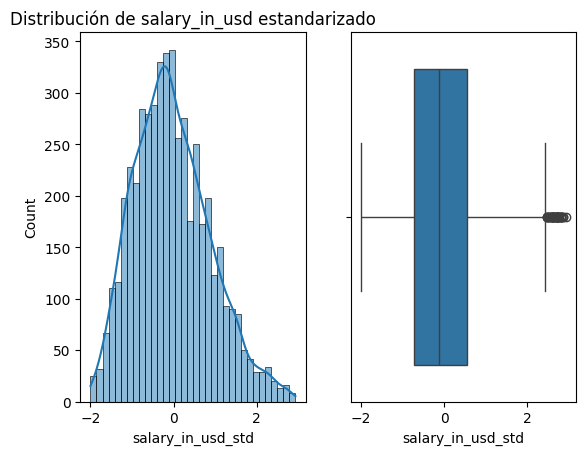

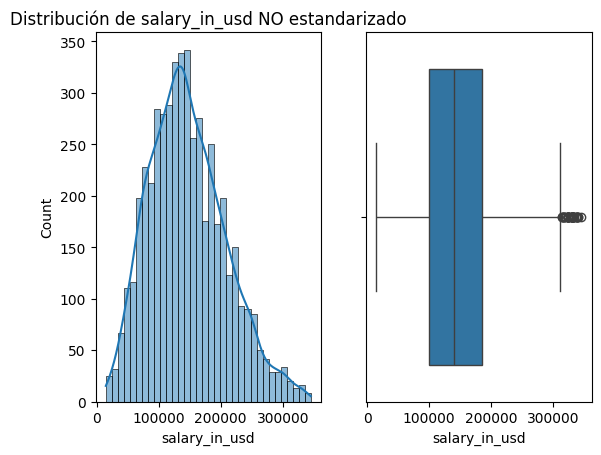

In [76]:
plt.subplot(1,2,1)
sns.histplot(
    data=df,
    x="salary_in_usd_std",
    kde=True
)
plt.title("Distribución de salary_in_usd estandarizado")

plt.subplot(1,2,2)
sns.boxplot(
    data=df,
    x="salary_in_usd_std",
)
plt.show()


plt.subplot(1,2,1)
sns.histplot(
    data=df,
    x="salary_in_usd",
    kde=True
)
plt.title("Distribución de salary_in_usd NO estandarizado")

plt.subplot(1,2,2)
sns.boxplot(
    data=df,
    x="salary_in_usd",
)
plt.show()
#Disminuyó la cantidad de outliers pero aún hay

In [77]:
# Ordenamos los datos por salario en dolares de manera descendente para imrpimir los salarios más altos

df.sort_values("salary_in_usd", ascending=False, inplace=False).head()

#De momento no los eliminaré, los consideraré como datos válidos porque tampoco son tan extremos

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_escalado,experience_level_num,salary_in_usd_norm,salary_in_usd_std
4098,2023,SE,FT,Research Scientist,345000,USD,345000,US,0,US,M,0.038892,3,0.448980,2.927388
2210,2024,SE,FT,Machine Learning Engineer,340000,USD,340000,US,0,US,M,0.038303,3,0.442177,2.852738
1957,2023,MI,FT,Research Scientist,340000,USD,340000,US,100,US,M,0.038303,2,0.442177,2.852738
3860,2024,SE,FT,Research Scientist,337300,USD,337300,US,0,US,M,0.037985,3,0.438503,2.812428
4502,2024,SE,FT,Research Scientist,337300,USD,337300,US,0,US,M,0.037985,3,0.438503,2.812428


### OBS:
- No los consideraré como errores o valores demasiados extremos ya que están dentro del z-score permitido
- Nuevamente predominan los dolares y las residencias en estados unidos
- Son puestos de trabajo bastante altos, por lo que no los consideraré como errores o valores demasiado extremos



**Instrucción:** Para cada variable, decide si es necesario tratar los outliers y, en caso afirmativo, elige un método de tratamiento (eliminación, imputación con la mediana, winsorización, etc.). Justifica tus decisiones.

**Nota:** Antes de imputar, crea una copia del DataFrame original para mantener los datos originales intactos.  Por ejemplo: `df_tratado = df.copy()`

## 12. Análisis Estadístico

En esta sección, realizaremos un análisis estadístico más profundo del conjunto de datos, incluyendo medidas de tendencia central, rangos y desviación estándar.


**Instrucción:** Calcula la media, mediana y moda de las variables `salary_in_usd`.


In [78]:
# -- Escribe aquí tu código para calcular las medidas de tendencia central --

print(f"Media de salary_in_usd: {df['salary_in_usd'].mean()}\n")

print(f"Mediana de salary_in_usd: {df['salary_in_usd'].median()}\n")

print(f"Moda de salary_in_usd: {df['salary_in_usd'].mode()[0]}\n")

Media de salary_in_usd: 146604.88929219602

Mediana de salary_in_usd: 140000.0

Moda de salary_in_usd: 150000



**Instrucción:** Calcula el rango y la desviación estándar de las variables `salary_in_usd`


In [79]:
# -- Escribe aquí tu código para calcular el rango y la desviación estándar --
print(f"Max: {df["salary_in_usd"].max()}. Min: {df["salary_in_usd"].min()}\n")

print(f"Rango de la variale salary_in_usd: {df["salary_in_usd"].max() - df["salary_in_usd"].min()}\n")

print(f"Desviación estándar de la variable salary_in_usd: {df['salary_in_usd'].std()}\n")


Max: 345000. Min: 15000

Rango de la variale salary_in_usd: 330000

Desviación estándar de la variable salary_in_usd: 61247.29542623645



**Instrucción:** Calcula e imprime el promedio acumulado de la variable `salary_in_usd`

In [80]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_escalado,experience_level_num,salary_in_usd_norm,salary_in_usd_std
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M,0.017678,2,0.204082,0.240006
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M,0.006482,2,0.074830,-1.178334
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M,0.008250,2,0.108087,-0.813388
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M,0.009157,3,0.105714,-0.839426
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M,0.015910,2,0.183673,0.016058


Promedio acumulado de salary_in_usd: 
844      42000.000000
1078     37755.500000
1390     38664.000000
56       32748.000000
1971     30532.200000
            ...      
28      146624.976387
23      146609.515335
22      146615.040952
5       146591.296087
4988    146604.889292
Name: salary_in_usd, Length: 4959, dtype: float64


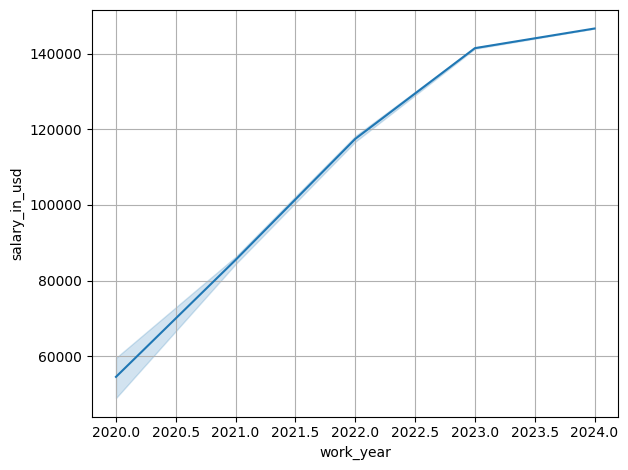

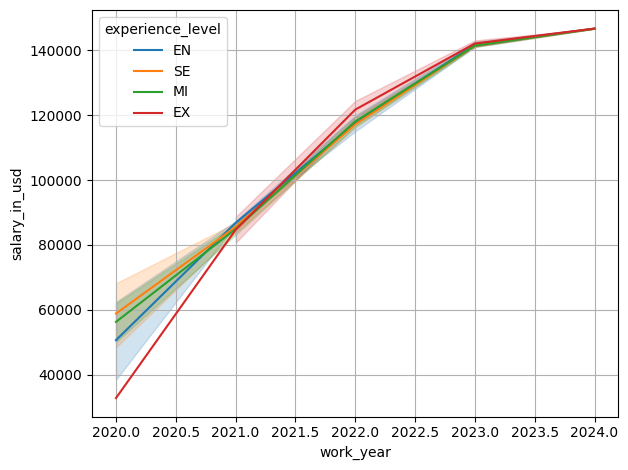

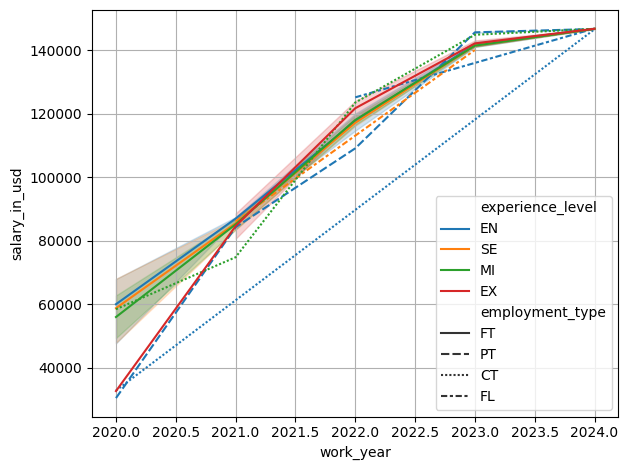

In [81]:
# -- Escribe aquí tu código para calcular el promedio acumulado --
# Ordenamos los datos por 'work_year' para ver el progreso de los salarios a lo largo de los años
df_sorted = df.sort_values("work_year")

promedio_acumulado = df_sorted["salary_in_usd"].expanding().mean()


print(f"Promedio acumulado de salary_in_usd: \n{promedio_acumulado}")

#COnsiderar hacer un gráfico con el promedio acumulado y el año, eje x el año y eje y el promedio acumulado
sns.lineplot(
    x = df_sorted["work_year"],
    y = promedio_acumulado,
   
)
plt.tight_layout()
plt.grid()
plt.show()

sns.lineplot(
    x = df_sorted["work_year"],
    y = promedio_acumulado,
    hue= df_sorted["experience_level"]
   
)
plt.tight_layout()
plt.grid()
plt.show()

sns.lineplot(
    x = df_sorted["work_year"],
    y = promedio_acumulado,
    hue= df_sorted["experience_level"],
    style= df_sorted["employment_type"]
)
plt.tight_layout()
plt.grid()
plt.show()

### OBS:
- Lo ordené por año y luego hice el promedio acumulado, al principio, en la impresión volvia a ordenar de manera ascendente, pero me di cuenta que eso no tenía sentido porque entonces no se veia el promedio ordenado por año.

- Se ve que al principio va disminuyendo el promedio y luego termina subiendo bastante

- En el primer gráfico se observa que el promedio de sueldos en dolares va aumentando con el paso de los años, en tan solo 4 años aumento más del 100%

- En el segundo gráfico, cuando los agrupamos por experiencia, ya se notan las diferencias de la evolucion de los salarios con respecto a la experiencia. Algo curioso es que la categoría "executive" es la que empezó con los salarios más bajos, luego ya se posicionó entre los más altos

- En el tercer gráfico se ve algo muy particular. Vemos que la categoría de experiencia "EN" y la categoría de tipo de empleo "CT", siguen una pendiente positiva diría que casi perfecta. Las demás son más irregulares

## 13. Análisis con PMF, CDF y PDF

En esta sección, analizaremos las funciones de probabilidad de masa (PMF), distribución acumulada (CDF) y densidad de probabilidad (PDF) para las variables numéricas.


**Instrucción:**  Para la variable `salary_in_usd`:
    - Si la variable es discreta, calcula y grafica la PMF.
    - Si la variable es continua, grafica la PDF usando `sns.kdeplot()`.
    - Calcula y grafica la CDF.


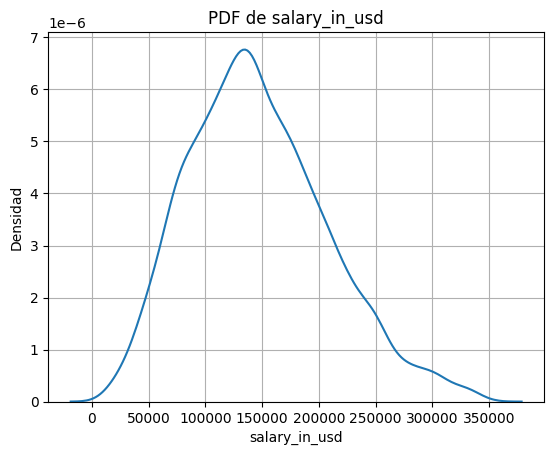

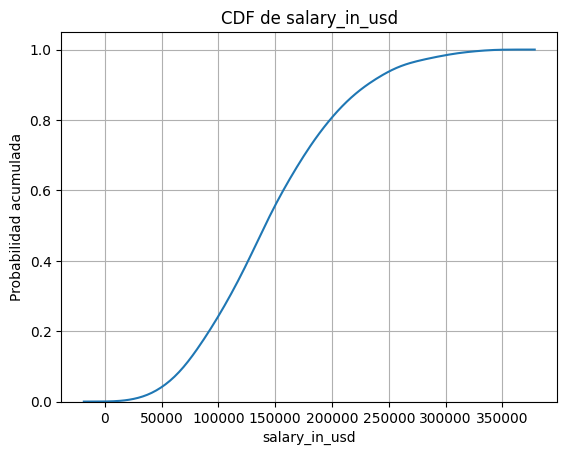

In [82]:
# -- Escribe aquí tu código para el análisis con PMF, CDF y PDF --

# EN este caso no se usa PMF porque no es una variable discreta

#PDF
sns.kdeplot(
    df["salary_in_usd"],    
)
plt.title("PDF de salary_in_usd")
plt.xlabel("salary_in_usd")
plt.ylabel("Densidad")
plt.grid()
plt.show()

#CDF
sns.kdeplot(
    df["salary_in_usd"],    
    cumulative=True,
)
plt.title("CDF de salary_in_usd")
plt.xlabel("salary_in_usd")
plt.ylabel("Probabilidad acumulada")
plt.grid()
plt.show()


### OBS:
- Vemos que hay un gran pico, una densidad enorme de salarios que se encuentra entre los 100.000 y 150.000 dolares aproximadamente 

- Un 25 % gana menos de 100.000, el 50% gana entre 100.000 y 175.000 y el otro 25% más de 175.000

## 14. Análisis Univariado

En esta sección, realizaremos un análisis univariado para cada una de las variables del conjunto de datos. Esto implica analizar cada variable de forma independiente, utilizando las visualizaciones y estadísticas descriptivas que hemos calculado en las secciones anteriores.

**Instrucción:** Para cada variable en el conjunto de datos, escribe un breve resumen que incluya:

-   Tipo de variable (numérica, categórica).
-   Medidas de tendencia central (media, mediana, moda).
-   Medidas de dispersión (rango, desviación estándar).
-   Forma de la distribución (simétrica, asimétrica, etc.).
-   Presencia de outliers.
-   Proporción de valores nulos (si los hay).
-   Cualquier otra observación relevante.


# Resumen: 

## work_year:
##### Tipo de variable:
- Es una variable numérica, pero yo lo considero como una categórica ordinal
##### Medidas de tendencia central:
- Media: Como la considero categórica, no usaré la media
- Mediana: 2023
- Moda: 2023
##### Medidas de disperción:
- Desviacón estandar: 0.69
- Rango: 4 años
##### Forma de la distribución: 
- Cola a la izquierda, sesgo negativo, asimétrica
##### Presencia de outliers: 
- No contiene outliers
##### Proporción de nulos:
- No contiene nulos 
##### OBS:
- Gran aumento de trabajos en 2023 y gran descenso para 2024 pero mucho más alto que todos los años anteriores a 2023

## experience_level_num (uso el numerico porque me sirve más para analisis)
##### Tipo de variable: 
- Categorica
##### Medidas de tendencia central:
- Media: 2.63
- Mediana: 3
- Moda: 3
##### Medidas de disperción:
- Desviacón estandar: 0.66
- Rango: 3
##### Forma de la distribución: 
- Cola a la derecha, sesgo positivo, asimétrica. Aunque el gráfico es bastante confuso, creo que es una cola a la derecha
##### Presencia de outliers: 
- No contiene outliers
##### Proporción de nulos:
- No contiene nulos
##### OBS: 
- La categoria senior es la más presente

## employment_type
##### Tipo de variable:
- Categorica
##### Medidas de tendencia central:
- Media: No existe media porque es categorica nominal
- Mediana: No existe mediana porque es categorica nominal
- Moda:  FT (Full time)
##### Medidas de disperción:
- Desviacón estandar: No existe porque es categorica nominal
- Rango: No existe porque es categorica nominal
##### Forma de la distribución: 
- Es una variable categorica nominal, no aporta nada 
##### Presencia de outliers: 
- No hay outliers, es categorica nominal
##### Proporción de nulos:
- No hay nulos
##### OBS:
- Es muy raro que en nuestra muestra casi el 100% sean full time, menos del 5% o incluso menos pertenecen a las otras categorias

## job_title
##### Tipo de variable:
- Categorica
##### Medidas de tendencia central:
- Media: No existe porque es categorica nominal
- Mediana: No existe porque es categorica nominal
- Moda: Data engineer
##### Medidas de disperción:
- Desviacón estandar: No existe porque es categorica nominal
- Rango: No existe porque es categorica nominal
##### Forma de la distribución: 
- Es una variable categorica nominal, no aporta nada 
##### Presencia de outliers: 
- No hay outliers, es categorica nominal
##### Proporción de nulos:
- No hay nulos
##### OBS:
- Los puestos con más presencia son data engineer, data scientist, data analyst y machine learning engineer. Los demás puestos, que son muchisimos, están con mucha menos gente por cada puesto

## salary_currency
##### Tipo de variable:
- Categorica
##### Medidas de tendencia central:
- Media: No existe porque es categorica nominal
- Mediana:No existe porque es categorica nominal
- Moda: USD
##### Medidas de disperción:
- Desviacón estandar: No existe porque es categorica nominal
- Rango: No existe porque es categorica nominal
##### Forma de la distribución: 
- Es una variable categorica nominal, no aporta nada 
##### Presencia de outliers: 
- No hay outliers, es categorica nominal
##### Proporción de nulos:
- No hay nulos
##### OBS: 
- Predomina USD con más del 90%, le siguen GBP y EUR ambos con menos del 10%

## salary 
##### Tipo de variable:
- Numerica
##### Medidas de tendencia central:
- Media: 1.565711e+05	
- Mediana: 1.409000e+05	
- Moda: 100.000 y 150.000
##### Medidas de disperción:
- Desviacón estandar: 2.063854e+05	
- Rango: 8485000
##### Forma de la distribución: 
- Asímetrica, curtosis enorme con un pico gigante, sesgo positivo
##### Presencia de outliers: 
- Totalmente, hay presencia de outliers debido a las distintas monedas
##### Proporción de nulos:
- No hay nulos
##### OBS: 
- La media, mediana y desviación estandar, etc, tienen valores extremos debido a las distintas monedas. Esto se debe a las distintas cotizaciones e inflación de cada moneda

## salary_in_usd
##### Tipo de variable:
- Numerica
##### Medidas de tendencia central:
- Media: 146604.889292	
- Mediana: 140000
- Moda: 
##### Medidas de disperción:
- Desviacón estandar: 61247.29
- Rango: 330000
##### Forma de la distribución: 
- Cola a la derecha, sesgo positivo
##### Presencia de outliers: 
- Hay presencia de outliers, inclusive despues de imputar muchos de ellos, siguen habiendo, pero no los considero erroneos ni extremos
##### Proporción de nulos:
- No hay nulos
##### OBS:
- Gran concentración del 50% de los sueldos entre 100.000 y 175.000 dolares aproximadamente

## employee_residence
##### Tipo de variable:
- Categorica
##### Medidas de tendencia central:
- Media: No existe porque es categorica nominal
- Mediana: No existe porque es categorica nominal
- Moda: US
##### Medidas de disperción:
- Desviacón estandar: No existe porque es categorica nominal
- Rango: No existe porque es categorica nominal
##### Forma de la distribución: 
- Es una variable categorica nominal, no aporta nada 
##### Presencia de outliers: 
- No hay outliers
##### Proporción de nulos:
- No hay nulos
##### OBS:
- 90% o más son residentes de estados unidos, aunque hay muchisima variedad de paises

## remote_ratio
##### Tipo de variable:
- Numerica pero lo asocio más con categorica ya que son porcentajes que se refieren a si son o no remotos
##### Medidas de tendencia central:
- Media: 32.930026
- Mediana: 0 (no remoto)
- Moda: 0 (no remoto)
##### Medidas de disperción:
- Desviacón estandar: 46.537052
- Rango: 100
##### Forma de la distribución: 
- Cola a la dereca, sesgo positivo
##### Presencia de outliers: 
- No hay outliers, son categoricos
##### Proporción de nulos:
- No hay nulos
##### OBS: 
- Más del 60% son presenciales, un poco más del 30% son hibridos y menos del 10% son remotos

## company_location
##### Tipo de variable:
##### Medidas de tendencia central:
- Media: No existe porque es categorica nominal
- Mediana: No existe porque es categorica nominal
- Moda: US
##### Medidas de disperción:
- Desviacón estandar: No existe porque es categorica nominal
- Rango: No existe porque es categorica nominal
##### Forma de la distribución: 
- Es una variable categorica nominal, no aporta nada 
##### Presencia de outliers: 
- Es categorica, no tiene outliers
##### Proporción de nulos:
- No hay nulos
##### OBS:
- Aproximadamente el 90% de las empresas están en estados unidos, el resto está distribuida en todos los paises del set de datos

## company_size
##### Tipo de variable:
##### Medidas de tendencia central:
- Media: No existe porque es categorica nominal
- Mediana: No existe porque es categorica nominal
- Moda: M (medium)
##### Medidas de disperción:
- Desviacón estandar: No existe porque es categorica nominal
- Rango: No existe porque es categorica nominal
##### Forma de la distribución: 
- Es una variable categorica nominal, no aporta nada 
##### Presencia de outliers: 
- No hay outliers, son categoricos
##### Proporción de nulos:
- No hay nulos
##### OBS:
- Aproximadamente el 90% son medianas, el resto se reparten entre grandes y pequeñas, es curioso que muchos de los sueldos más altos no pertenecen a empresas grandes
         
       

## 15. Análisis Multivariado

En esta sección, realizaremos un análisis multivariado para explorar las relaciones entre las diferentes variables del conjunto de datos.


**Instrucción:** Crea un diagrama de dispersión para visualizar la relación entre `salary_in_usd` y `remote_ratio`.  Interpreta el gráfico.


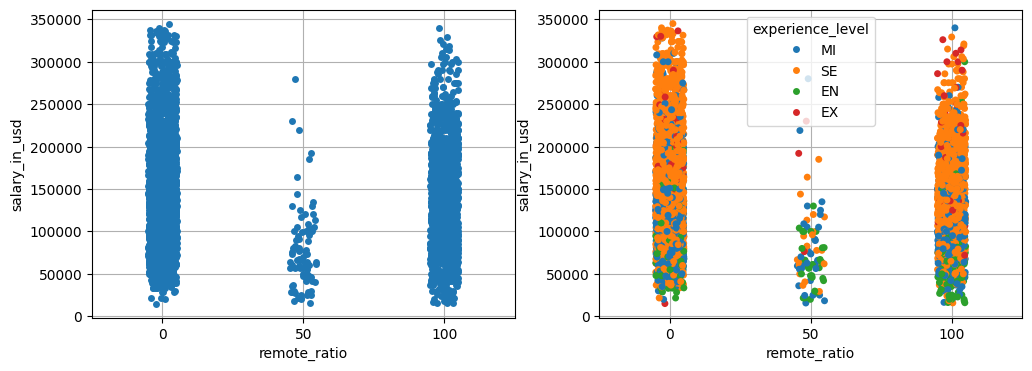

In [83]:
# -- Escribe aquí tu código para crear el diagrama de dispersión --

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.stripplot(
    data=df,
    x = "remote_ratio",
    y = "salary_in_usd"
    )
plt.grid()

plt.subplot(1,2,2)
sns.stripplot(  #usé stripplot porque se ven mejor los datos que con scatterplot cuando se agrupan
    data=df,
    x = "remote_ratio",
    y = "salary_in_usd",
    hue= "experience_level", # Adicionalmente agregamos experiencia para ver la relación
    jitter=True
)
plt.grid()
plt.show()

### OBS:
- Vemos que los sueldos más bajos son los que pertenecen a la modalidad hibrida
- La modalidad presencial cuenta con los sueldos más altos
- La categoría senior, son los que abarcan los sueldos más altos y en general, la mayoría de sueldos. Como era de esperarse la categoría entry es la más baja
- Hay más seniors en trabajo presencial y remoto, en híbrido predominan los "EN"

**Instrucción:** Crea un gráfico de barras apiladas para visualizar la relación entre `company_size` y `experience_level`. Interpreta el gráfico.


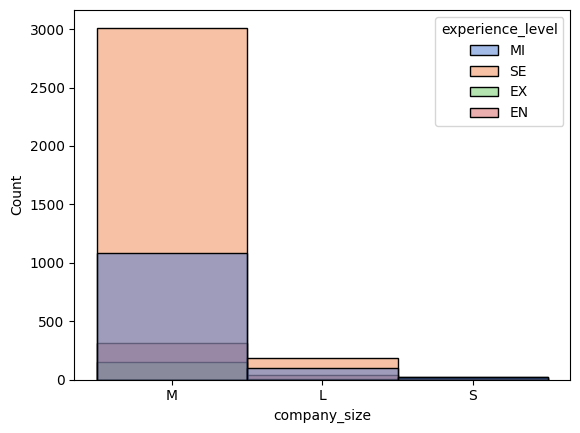

In [84]:
# -- Escribe aquí tu código para crear el gráfico de barras apiladas --
sns.histplot(
    data = df,
    x= "company_size",
    hue= "experience_level",
    multiple="layer",
    palette="muted"
)
plt.show()

#Por alguna razón que no entiendo, al usar "stack" en lugar de "layer", no se ve bien el gráfico.
#Se ve como si fuera que la categoria "MI" está por encima de senior, y no es así. Lo solucioné usando "layer"



In [85]:
#Acá se comprueba el error que mencioné anteriormente
test = df.groupby(["company_size"])["experience_level"].value_counts()
test

company_size  experience_level
L             SE                   187
              MI                    99
              EN                    40
              EX                     7
M             SE                  3013
              MI                  1087
              EN                   315
              EX                   149
S             MI                    25
              EN                    19
              SE                    16
              EX                     2
Name: count, dtype: int64

- Se ve claramente que las empresas medianas dominan el set de datos, así tambien los seniors 

**Instrucción:** Crea un boxplot para visualizar la relación entre `salary_in_usd` y `experience_level`. Interpreta el gráfico.


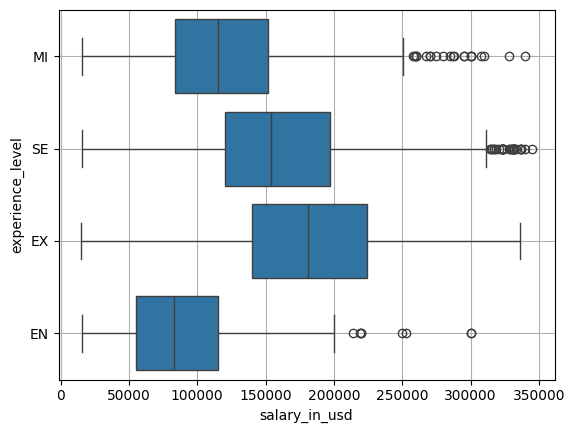

In [86]:
# -- Escribe aquí tu código para crear el boxplot --

sns.boxplot(
    data = df,
    x = "salary_in_usd",
    y = "experience_level",
)
plt.grid()
plt.show()

- Aquí hemos identificado outliers al agruparlos por categorías. Vamos a tratarlos

In [87]:
#Funcion para identficar outliers usando el rango intercuartilico
def identificar_outliers(df_agrupado):
    Q1 = df_agrupado["salary_in_usd"].quantile(0.25)
    Q3 = df_agrupado["salary_in_usd"].quantile(0.75) #Acá calculamos los cuartiles
    
    IQR = Q3 - Q1  #rango intercuatilco
    
    limite_inferior = Q1 - 1.5 * IQR  #se establece el limite inferior y superior
    limite_superior = Q3 + 1.5 * IQR
    
    #acá devolvemos los outliers
    return df_agrupado[(df_agrupado["salary_in_usd"] < limite_inferior) | (df_agrupado["salary_in_usd"] > limite_superior)]


# esta funcion es para imputar los ouliers con la mediana
def imputar_outliers(df_agrupado):
    #display(df_agrupado) #para ver cómo funcionaba la iteración
    
    mediana = df_agrupado["salary_in_usd"].median().round(0) #redondeamos la mediana porque daba una advertencia de que no era entero
    #print(mediana) # para ver como funcionaba la iteracion
    
    outliers_identificados = identificar_outliers(df_agrupado) 
    #display(outliers_identificados)  #para ver cómo funcionaba la iteracion
    
    df_agrupado.loc[outliers_identificados.index, "salary_in_usd"] = mediana
    
    return df_agrupado

#se agrupa y llama al metodo para imputar outliers
df_sin_outliers = df.groupby("experience_level").apply(imputar_outliers).reset_index(drop=True) # drop true para que no tenga indice innecesario

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8144\1391975228.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sin_outliers = df.groupby("experience_level").apply(imputar_outliers).reset_index(drop=True) # drop true para que no tenga indice innecesario


- TODAVIA HAY UNA ADVERTENCIA QUE NO SÉ SOLUCIONAR, DE MOMENTO NO AFECTA AL CÓDIGO

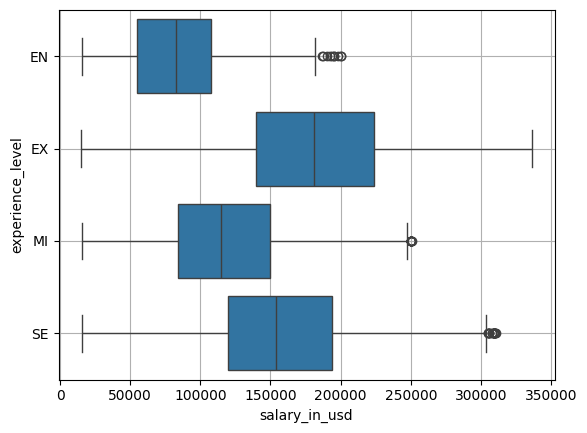

In [88]:
#Acá vemos el resultado de la imputación de los outliers con el mismo gráfico
sns.boxplot(
    data = df_sin_outliers,
    x = "salary_in_usd",
    y = "experience_level",
)
plt.grid()
plt.show()

- Acá ya disminuyeron los outliers, ya los considero válidos

- En la categoría "EN", se ve un sesgo positivo, el 50% de los salarios están entre 53.000 y 105.000 aproximadamente
- En la categoría "EX", se ve un ligero sesgo negativo,  el 50% de los salarios están entre 140.000 y 225.000 aproximadamente, se ven bigotes muy largos, indica un gran rango de salarios
- En la categoróa "MI", sse ve un sesgo positivo, el 50% de los salarios están entre 80.000 y 150.000 aproximadamente.
- En la categoría "SE", se ve un muy ligero sesgo negativo, el 50% de los salarios están entre 125.000 y 280.000 aproximadamente, bigotes largos, indica un gran rango de salarios

**Instrucción:**  Plantea al menos tres preguntas de investigación adicionales que podrían responderse con un análisis multivariado de este conjunto de datos.  Para cada pregunta, describe brevemente el tipo de análisis que realizarías y qué variables utilizarías.


### Preguntas:

- ¿Por qué predominan los trabajos presenciales?
    - Intenraría ver la relación de los salarios, los tamaños de empresas y la locación. Podría sacar algunas conclusiones de ahí
- ¿Por qué las empresas medianas tienen más trabajadores en general y en especifico Seniors?
    - Intentaría ver la relación entre las empresas, los salarios, las experiencias, y tambien diría que el año, ya que luego del 2020 es donde fueron aumentando considerablemente los trabajos remotos
- ¿Por qué casi no hay empleos de otras categorías que no sean full time?
    - Habría que ver los sueldos de los demás puestos, los tipos de empresa, el nivel de experiencia y tambien la localizacion

## 16. Prueba de Hipotesis

En esta sección, realizaremos una prueba de hipótesis para responder a una pregunta específica sobre los datos.

**Instrucción:**
Imagina que una persona que trabaja en recursos humanos en el sector tecnológico afirma que el salario promedio en USD para los trabajos con el titulo *Data Scientist* es de al menos \$150,000.  Utiliza una prueba de hipótesis para determinar si hay suficiente evidencia para rechazar esta afirmación. Utiliza un nivel de significación del 0.05. Antes de realizar la prueba, segmenta primero tus datos para tener un data frame con la información unicamente de los Data Scientist, luego imputa los valores faltantes en la variable 'salary_in_usd' con la mediana.

**Pasos a seguir:**

1.  Segmentar el DataFrame para obtener solo las filas que correspondan a *Data Scientist*
2.  Imputar los valores faltantes en 'salary_in_usd' con la mediana, en caso de que existan.
3.  Formular la hipótesis nula y alternativa.
4.  Realizar una prueba t de una muestra (utiliza `ttest_1samp` de `scipy.stats`).
5.  Interpretar el valor p y tomar una decisión.

**Escribe tu código y tu interpretación a continuación:**

In [ ]:
# -- Escribe aquí tu código para la prueba de hipótesis --
# Paso 1: Segmentar el DataFrame para Data Scientist
df_prueba_hipotesis = df_sin_outliers.query("job_title == 'Data Scientist'").copy() #Crea una copia para no modificar el df original

# Paso 2: Formular las hipótesis
# -- Escribe aquí tus hipótesis --
# H0: mu >= 150000
# H1: mu < 150000

# Paso 3: Realizar la prueba t de una muestra
t_statistic, p_value = ttest_1samp(df_prueba_hipotesis['salary_in_usd'], 150000, alternative='less')

print(f"Estadístico t: {t_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

# Paso 4: Tomar una decisión
alpha = 0.05
if p_value <= alpha:
    print("Rechazamos la hipótesis nula. Hay suficiente evidencia para afirmar que el sueldo promedio de un Data Scientist es menor a $150.000 o que NO es mayor o igual $150.000")
else:
    print("No rechazamos la hipótesis nula. No hay suficiente evidencia para afirmar que el sueldo promedio de un Data Scientist es menor a $150.000 o que sea mayor o igual a $150.000  ")   

Estadístico t: 0.0765
Valor p: 0.5305
No rechazamos la hipótesis nula. No hay suficiente evidencia para afirmar que el sueldo promedio de un Data Scientist es menor a $150.000  


- La prueba arroja que no se rechaza la hipotesis nula, no hay suficiente evidencia para afirmar que el sueldo promedio de un Data Scientist es menor a 150.000 o que es mayor o igual a 150.000. Esto no significa que el sueldo sea mayor, solo indica que no tenemos suficientes pruebas para demostrarlo, pero tampoco podemos afirmarlo, solamente faltan pruebas

## 17. Conclusiones

En esta sección, resumiremos los hallazgos más importantes del análisis exploratorio de datos y extraeremos conclusiones sobre las características más relevantes que influyen en los salarios en la industria tecnológica.


**Instrucción:** Escribe un resumen de los hallazgos clave de tu análisis, incluyendo:

-   Las variables más relevantes para determinar el salario en USD.
-   Las relaciones más significativas entre las variables.
-   El impacto de los outliers y cómo se manejaron.
-   Las principales conclusiones que se pueden extraer del análisis.
-   Limitaciones del análisis y posibles extensiones.


In [104]:
# -- Escribe aquí tus conclusiones --

## 18. Reflexión (Opcional)

**Instrucción:** Reflexiona sobre lo que has aprendido en este proyecto. ¿Qué te ha resultado más útil? ¿Qué te ha parecido más desafiante? ¿Cómo podrías aplicar estas técnicas en tus propios proyectos?


In [105]:
# -- Escribe aquí tu reflexión --